## importing libraries

In [21]:
# Importing libraries and adjusting plotting settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn import metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pywaffle import Waffle
plt.rc('font', size=20) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('legend', fontsize=20)    
plt.rc('figure', titlesize=20)
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

## Reading the dataset

In [22]:
df = pd.read_csv('../Dataset/heart diseases.csv')

# Preprocessing

In [23]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [24]:
df['PhysicalHealth'].max()

30.0

In [25]:
df['SleepTime'].max()

24.0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Checking nulls

In [27]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Checking Duplicates
- It is obvious that there are duplicate records because almost all features are categorical and there is a chance that two records share the same values across all features

In [28]:
print(f'Number of duplicated recrods = {df.duplicated().sum()}')

Number of duplicated recrods = 18078


## Checking Outliers
-The only column could have outliers is BMI, and its values ranging from 12-94.8 which is a real range and we can can consider not outliers on it

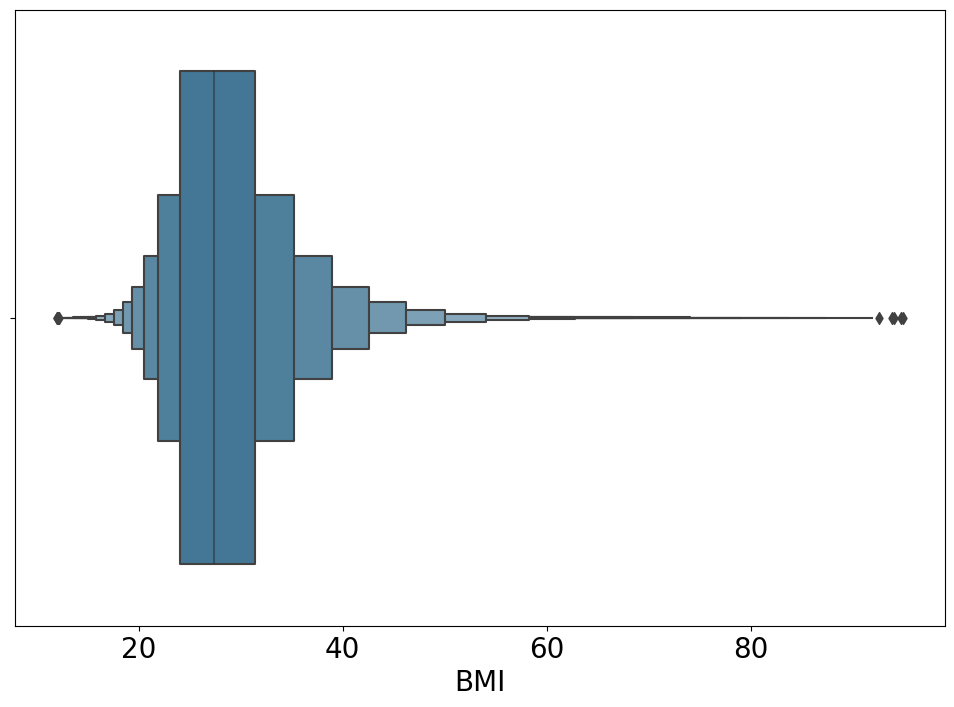

In [29]:
plt.figure(figsize=(12,8))
sns.boxenplot(x=df.BMI, palette='mako')
plt.show()

## Binning BMI for better insights

In [30]:
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight BMI less than 18.5', 'Normal weight BMI between 18.5 to 25', 'Overweight BMI between 25 to 30', 'Obese BMI between 30 to 35', 'Extremely Obese BMI greater than 35']
df['BMICategory'] = pd.cut(df['BMI'], bins, labels=names)
df.drop('BMI',axis=1,inplace=True)

In [31]:
binsPhy = [-1, 7, 14, 21, 32]
names=['0-6','7-13','14-20','21-30']
df['PhyHealthCategory'] = pd.cut(df['PhysicalHealth'], binsPhy, labels=names)
df.drop('PhysicalHealth',axis=1,inplace=True)

In [32]:
df['PhyHealthCategory'].value_counts()

0-6      278548
21-30     21715
7-13      10231
14-20      9301
Name: PhyHealthCategory, dtype: int64

In [33]:
bins = [-1, 7, 14, 21, 32]
names=['0-6','7-13','14-20','21-30']
df['MentHealthCategory'] = pd.cut(df['MentalHealth'], bins, labels=names)
df.drop('MentalHealth',axis=1,inplace=True)

In [34]:
df['MentHealthCategory'].value_counts()

0-6      268219
21-30     20577
14-20     16191
7-13      14808
Name: MentHealthCategory, dtype: int64

In [35]:
bins = [0, 6, 12, 18, 25]
names=['0-5','6-11','12-17','18-24']
df['SleepTimeCategory'] = pd.cut(df['SleepTime'], bins, labels=names)
df.drop('SleepTime',axis=1,inplace=True)

In [36]:
df['BMICategory'].value_counts()

Overweight BMI between 25 to 30         114355
Normal weight BMI between 18.5 to 25     97778
Obese BMI between 30 to 35               61169
Extremely Obese BMI greater than 35      41379
Underweight BMI less than 18.5            5114
Name: BMICategory, dtype: int64

In [37]:
df['SleepTimeCategory'].value_counts()

6-11     221810
0-5       96986
12-17       888
18-24       111
Name: SleepTimeCategory, dtype: int64

In [38]:
df

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMICategory,PhyHealthCategory,MentHealthCategory,SleepTimeCategory
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes,Underweight BMI less than 18.5,0-6,21-30,0-5
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No,Normal weight BMI between 18.5 to 25,0-6,0-6,6-11
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No,Overweight BMI between 25 to 30,14-20,21-30,6-11
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes,Normal weight BMI between 18.5 to 25,0-6,0-6,0-5
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No,Normal weight BMI between 18.5 to 25,21-30,0-6,6-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No,Overweight BMI between 25 to 30,0-6,0-6,0-5
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No,Overweight BMI between 25 to 30,0-6,0-6,0-5
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No,Normal weight BMI between 18.5 to 25,0-6,0-6,0-5
319793,No,No,No,No,No,Female,25-29,Hispanic,No,No,Good,No,No,No,Obese BMI between 30 to 35,0-6,0-6,6-11


In [39]:
df.isnull().sum()

HeartDisease          0
Smoking               0
AlcoholDrinking       0
Stroke                0
DiffWalking           0
Sex                   0
AgeCategory           0
Race                  0
Diabetic              0
PhysicalActivity      0
GenHealth             0
Asthma                0
KidneyDisease         0
SkinCancer            0
BMICategory           0
PhyHealthCategory     0
MentHealthCategory    0
SleepTimeCategory     0
dtype: int64

## Encoding Categorical variables

- Encoding features with no ordering by one-hot encoding
- Endocing features with ordering by label encoding

In [40]:
order_cols = ["BMICategory", "AgeCategory", "HeartDisease","PhyHealthCategory","MentHealthCategory","SleepTimeCategory"]
no_order_cols = [ "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
            "Sex", "Race", "Diabetic", "PhysicalActivity",
            "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]

# Label encoding
for col in order_cols:
    df[col] = preprocessing.LabelEncoder().fit_transform(df[col])

# One-hot encoding
for col in no_order_cols:
    dummy_col = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummy_col], axis=1)
    del df[col]

In [41]:
df

,HeartDisease,AgeCategory,BMICategory,PhyHealthCategory,MentHealthCategory,SleepTimeCategory,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,7,4,0,2,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,1
1,0,12,1,0,0,3,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,0,9,3,1,2,3,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
3,0,11,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,0,4,1,2,0,3,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,8,3,0,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
319791,0,3,3,0,0,0,0,1,1,0,...,0,0,0,1,0,1,1,0,1,0
319792,0,5,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
319793,0,1,2,0,0,3,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0


## Imbalancing problem
- The data suffers from imbalancing problem with 91 to 9 ratio

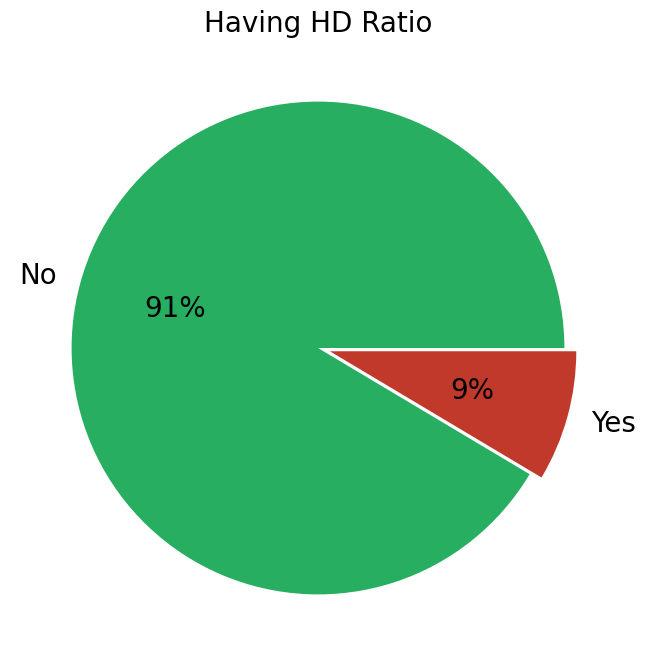

In [42]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(df['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#27ae60','#c0392b'])
ax.set_title('Having HD Ratio')
fig.show()

### Oversampling using SMOTE

In [43]:
X = df.drop('HeartDisease',axis=1)
Y = df['HeartDisease']

In [44]:
from imblearn.over_sampling import SMOTE
over = SMOTE(k_neighbors=2000)
X, Y = over.fit_resample(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2022, stratify=Y)

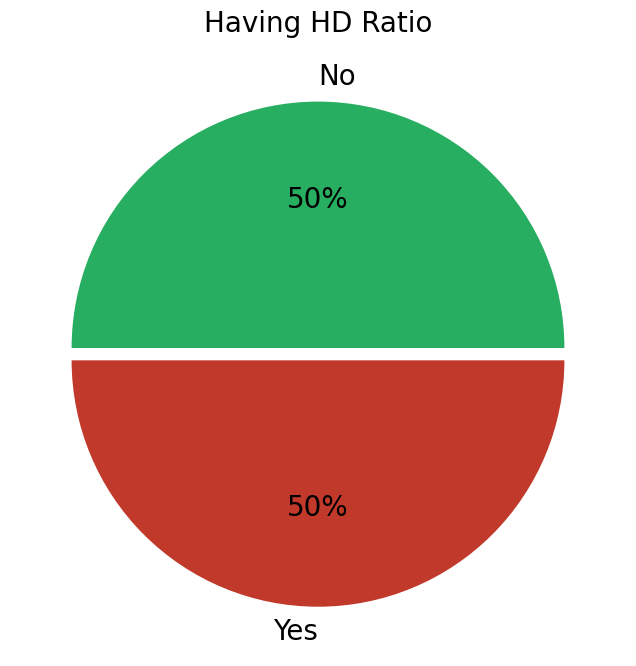

In [45]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(Y.value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#27ae60','#c0392b'])
ax.set_title('Having HD Ratio')
fig.show()

In [46]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC

models = {
    "DT":DecisionTreeClassifier(random_state = 2022, max_depth=15),
    "Logistic": LogisticRegression(random_state = 2022),
    "SGD": SGDClassifier(random_state = 2022),
    "RF":RandomForestClassifier(random_state = 2022, max_depth=15),
    "Ada":AdaBoostClassifier(random_state=2022),
    "XGB":XGBClassifier(random_state=2022)
}
results = pd.DataFrame(columns=['Model', 'Train Score','Test Score','Recall','Precision','f1-score'])
def test_models(X_train, X_test, y_train, y_test):
    for model in models:
        fit = models[model].fit(X_train, y_train)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_title(model)
        metrics.plot_confusion_matrix(fit, X_test, y_test, cmap='Blues', normalize='true', ax=ax)
        plt.show()
        train_score = round(fit.score(X_train, y_train),3)
        test_score = round(fit.score(X_test, y_test),3)
        recall = round(metrics.recall_score(y_test, fit.predict(X_test))*100,2)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test))*100,2)
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test))*100,2)
        results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1]

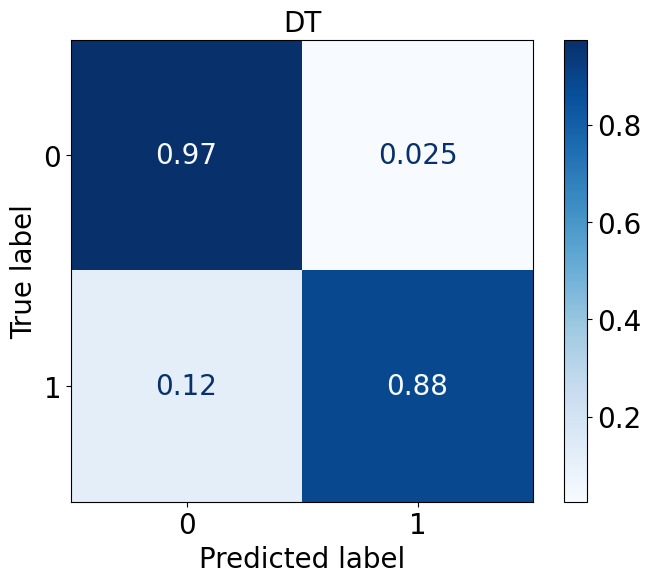

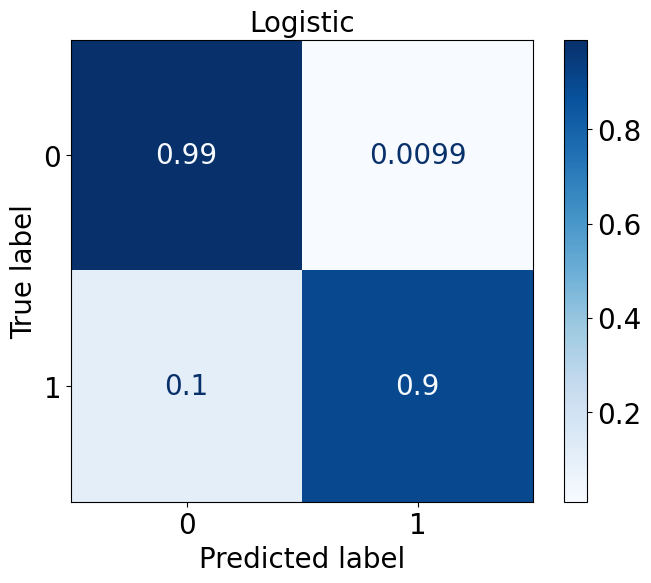

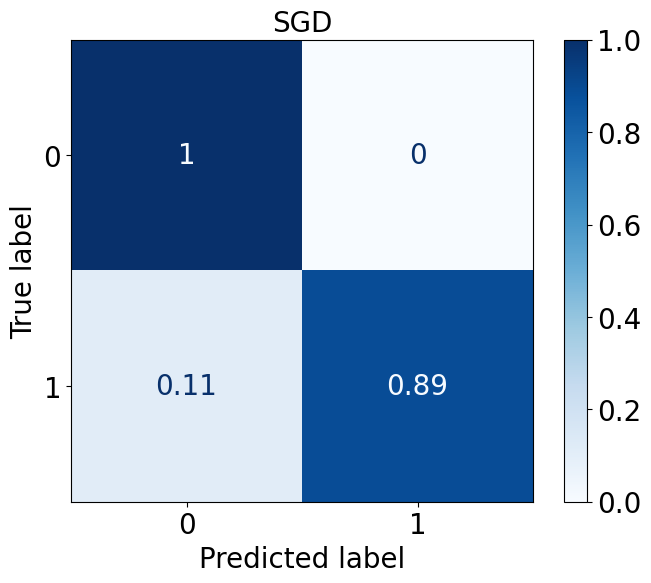

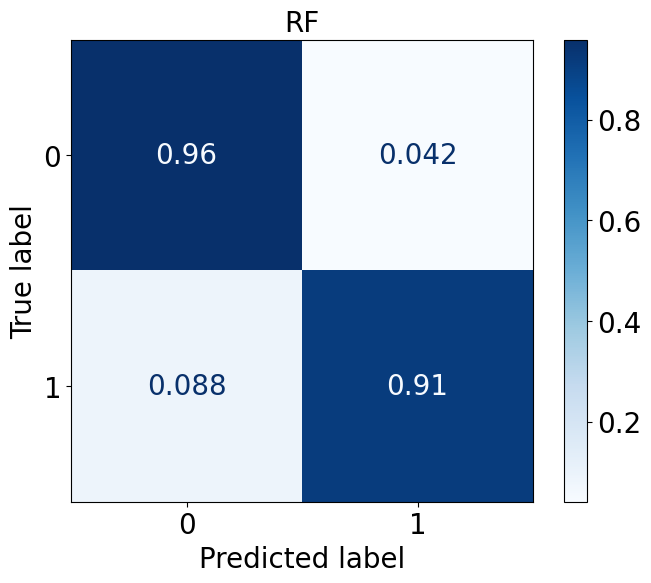

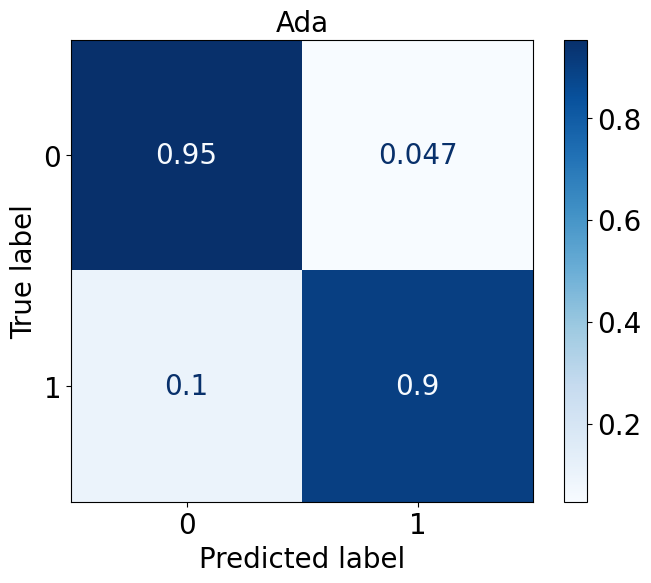

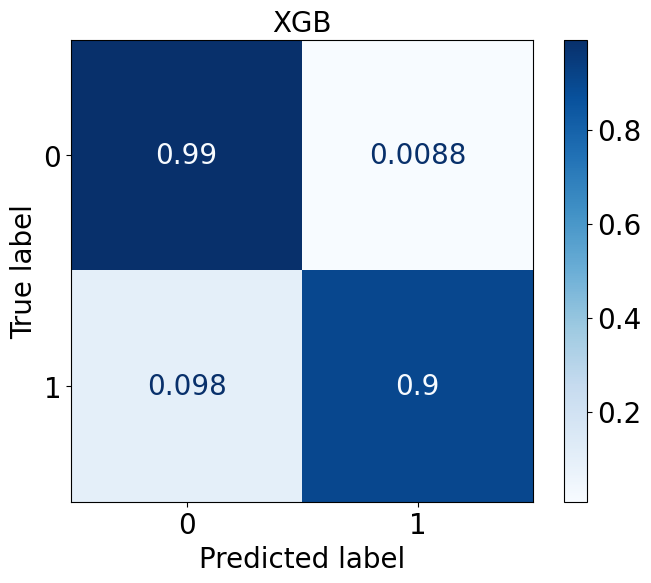

In [47]:
test_models(X_train, X_test, y_train, y_test)

In [48]:
results

,Model,Train Score,Test Score,Recall,Precision,f1-score
0,DT,0.935,0.929,88.32,97.23,92.56
1,Logistic,0.943,0.944,89.82,98.91,94.15
2,SGD,0.944,0.945,89.03,100.00,94.19
3,RF,0.940,0.935,91.20,95.65,93.37
4,Ada,0.924,0.925,89.72,95.07,92.32
5,XGB,0.947,0.946,90.15,99.03,94.38


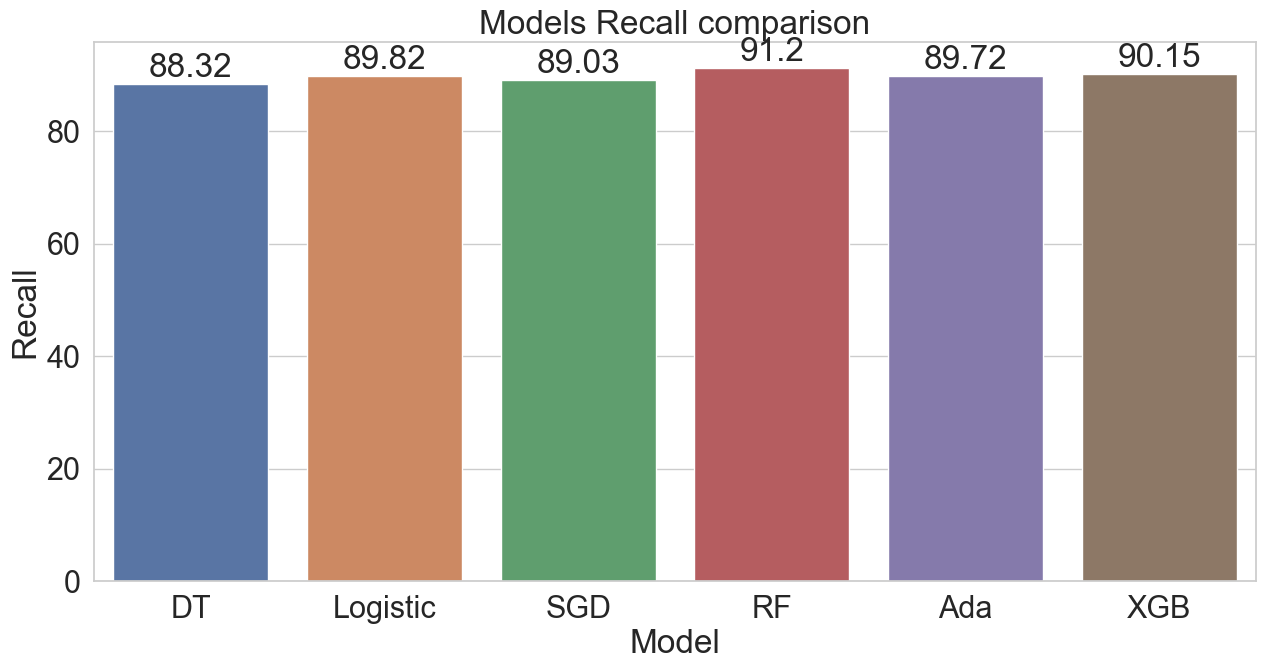

In [49]:
plt.figure(figsize=(15, 7))
sns.set_theme(style="whitegrid", font_scale=2)
ax = sns.barplot(x='Model', y="Recall", data=results)
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Models Recall comparison')
fig.show()

In [50]:
# results = pd.DataFrame(columns=['Train Score','Test Score','Recall','Precision','f1-score'])

def fit_model_result(x_train, x_test, y_train, y_test, model):
    # Modelling
    reg = model
    reg.fit(x_train,y_train)
    
    # Getting evaluation results
    y_pred = reg.predict(x_test)
    report = metrics.classification_report(y_test, y_pred, digits=5, output_dict=True)
    recall = round(report['weighted avg']['recall']*100, 2)
    precision = round(report['weighted avg']['precision']*100, 2)
    f1 = round(report['weighted avg']['f1-score']*100,2)
    test_score = round(report['accuracy']*100,2)
    train_score = round(reg.score(x_train,y_train)*100,2)
    
    # Printing results
#     results.loc[len(results.index)] = [train_score, test_score, recall, precision, f1]
    print(metrics.classification_report(y_test, y_pred, digits=5))
    
    # Displaying confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    metrics.plot_confusion_matrix(reg, x_test, y_test, cmap='Blues', normalize='true',ax=ax, display_labels=['No HD','HD'])
    plt.show()
    return reg

              precision    recall  f1-score   support

           0    0.90962   0.99120   0.94866     73105
           1    0.99034   0.90151   0.94384     73106

    accuracy                        0.94636    146211
   macro avg    0.94998   0.94636   0.94625    146211
weighted avg    0.94998   0.94636   0.94625    146211



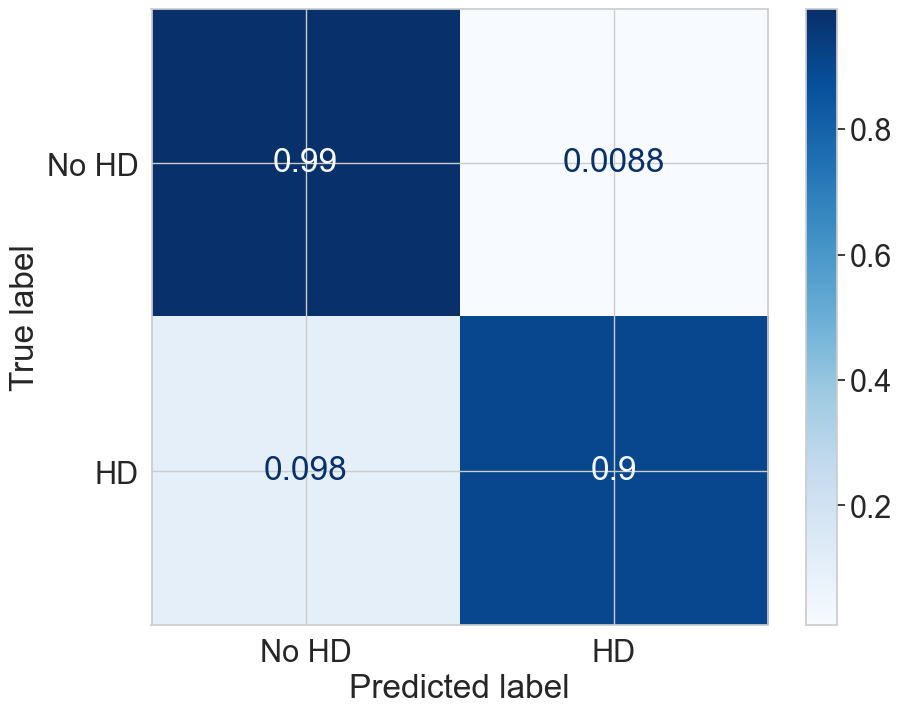

In [51]:
model = fit_model_result(X_train, X_test, y_train, y_test,XGBClassifier(random_state=2022))

In [52]:
score = cross_val_score(XGBClassifier(random_state=2022),X, Y, cv=6,scoring='recall_macro')

In [53]:
score.mean()

0.9396984495010635

In [54]:
import joblib

In [55]:
joblib.dump(model, 'XGBnew.pkl')

['XGBnew.pkl']

In [56]:
model.predict_proba

<bound method XGBClassifier.predict_proba of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=2022, reg_alpha=0, reg_lambda=1, ...)>